# **K-Means Clustering | Jun Lee**
K-Means Clustering is an unsupervised machine learning algorithm used to partition data into distinct groups or clusters. Each data point is assigned to the cluster whose center (centroid) is nearest. The goal of K-Means is to minimize the variance within each cluster.

### **Theory**
**Clustering the K-Means:** <br>
-   The algorithm begins by initializing k centroids randomly.<br>
-   Each data point is assigned to the nearest centroid. <br>
-   Centroids are recalculated as the mean of the data points assigned to them. <br>
-   Steps are repeated until centroids no longer change significantly. <br>
<br>

**Finding the distance between the points of data** <br>
Similarly to KNN, we are using the Euclidian distance to measure the distance between our points so we can cluster them. <br>
The equation is as follows: <br>
$$
d = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$
<br>

**Choosing our K Varible**: <br>
The number of clusters k must be specified in advance. It determines how many centroids the algorithm will use. Selecting the appropriate k is really important to cluster well.

-------------------------------------------------------------------

### LIBRARIES
Various libraries are imported for data handling (numpy, pandas), visualization (matplotlib, seaborn), and clustering (KMeans). These tools are used to perform K-Means clustering and visualize the results.

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as am
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

import seaborn as sns

First, lets configure the setup enviroment. %matplotlib inline ensures plots are displayed within the notebook, and rcParams sets the default figure size for plots.

In [3]:
# Graph setup
%matplotlib inline
rcParams['figure.figsize'] = 7,4

Next, we are going to load the Iris dataset is loaded from `sklearn.datasets`, which contains features of iris flowers and their species. X is scaled to standardize the features, improving clustering performance. The target variable y is converted into a `DataFrame` for easy manipulation. The first 10 rows of X are displayed to inspect the data.

In [4]:
# We will use the scikit built-in dataset 'Iris' - https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = datasets.load_iris()

X = scale(iris.data)

y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10,]    

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [5]:
# to suppress memory leak warning:
import os
os.environ['OMP_NUM_THREADS'] = '1'


**Clustering the Data** <br>
K-Means clustering is performed with `k=3` clusters, initializing the centroids randomly `(n_init=10)`. The algorithm assigns each data point to one of the three clusters based on the nearest centroid.

In [6]:
# Cluster the data
clustering = KMeans(n_clusters=3, random_state=5, n_init=10) # sets the number of centroids and randomizes centroid positions
clustering.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=5)

**Visualising the Data**
The Iris dataset is converted into a DataFrame with appropriate column names. The clustering labels are relabeled to match the true class labels for comparison. The np.choose function reorders the labels to align with the original classes.

In [7]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ["sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]
y.columns = ["Targets"]

**PLotting the Data** <br>
Two scatter plots are generated side-by-side. The left plot shows the true class labels of the Iris dataset, while the right plot shows the clusters identified by K-Means. Both plots visualize the petal length and width features, allowing comparison between true and predicted clusters.

Text(0.5, 1.0, 'K-Means Classification')

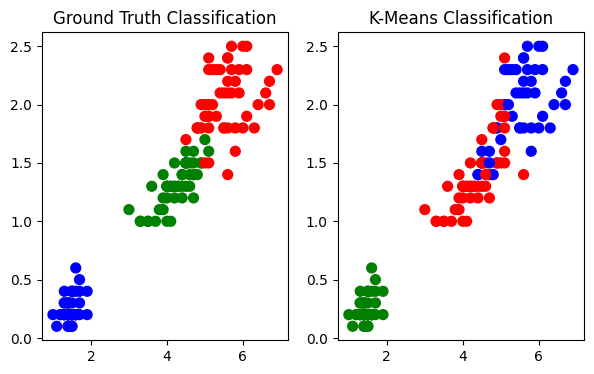

In [8]:
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)

plt.subplot(1,2,1)

# Example color_theme definition
color_theme = np.array(['blue', 'green', 'red'])

# Petal_Length along the x-axis and Petal_Width along the y-axis
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title("K-Means Classification")

**Evaluating the Data** <br>The classification_report provides detailed performance metrics of the clustering, including precision, recall, and F1 score for each cluster. This evaluation helps assess how well the K-Means clustering has grouped the data.

In [9]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



### **Evaulating my Algorithm** <br>
 For class 0, the algorithm performs well with a precision, recall, and F1-score of 1.00, indicating perfect clustering. For class 1, precision is 0.74 and recall is 0.78, leading to an F1-score of 0.76, which reflects a moderate performance with some misclassification. Similarly, class 2 has precision and recall values of 0.77 and 0.72, respectively, resulting in an F1-score of 0.74, showing reasonable accuracy but also some errors. The overall accuracy of 0.83 signifies that the algorithm correctly classified 83% of the data points. Both the macro and weighted averages of precision, recall, and F1-score are 0.83, indicating balanced performance across all classes. The results suggest that while our K-Means clustering is generally effective, there is room for improvement, particularly in distinguishing between classes 1 and 2.